In [49]:
library(ggplot2)
theme_set(theme_light() + theme(text=element_text(size=20)))

# Funciones auxiliares

eunif = function(a, b) (a + b) / 2
vunif = function(a, b) (b - a)^2 / 12
munif = function(a, b, t) (exp(t * b) - exp(t * a)) / t * (b - a)

enorm = function(u, sd) u
vnorm = function(u, sd) sd^2
mnorm = function(u, sd, t) exp(sd^2 * t^2 / 2 + u * t)

egamma = function(alpha, lambda) alpha / lambda
vgamma = function(alpha, lambda) alpha / lambda^2

# Práctica 5

## Ejercicio 1

En una línea de producción los productos pasan por 4 procesos sucesivos (preparación, armado, control y embalaje) hasta quedar listos para la venta. Sean $X_1$, $X_2$, $X_3$ y $X_4$ los tiempos que tarda en cumplirse cada uno de los procesos (en minutos). Se sabe que los cuatro procesos actuán en forma independiente y que $X_1 \sim \mathcal{U}(3,5)$, $X_2 \sim \mathcal{N}(3,\tfrac{1}{4})$, $X_3 \sim \Gamma(6, 3)$ y $X_4 \sim \mathcal{U}(2, 4)$. Sea $Y$ la variable aleatoria que mide el tiempo que tarda un producto en pasar por toda la línea de producción. Hallar $E(Y)$ y $V(Y)$.

$Y = X_1 + X_2 + X_3 + X_4$

$E(Y) = E(X_1 + X_2 + X_3 + X_4) = E(X_1) + E(X_2) + E(X_3) + E(X_4)$

$V(Y) = V(X_1 + X_2 + X_3 + X_4) = V(X_1) + V(X_2) + V(X_3) + V(X_4)$

In [19]:
# E(Y)
eunif(3, 5) + enorm(3, sqrt(1/4)) + egamma(6, 3) + eunif(2, 4)

[1] 12

In [20]:
# V(Y)
vunif(3, 5) + vnorm(3, sqrt(1/4)) + vgamma(6, 3) + vunif(2, 4)

[1] 1.583333

# Ejercicio 2

## Pregunta A

Sea $X$ una v.a. con distribución desconocida tal que $E(X) = 5$ y $V(X) = 0.1$. Usando la desigualdad de Tchebyshev, determinar una cota inferior para la probabilidad de que $X$ esté entre $4.5$ y $5.5$.

$
\begin{align*}
P(4.5 \leq X \leq 5.5)
&= P(-0.5 \leq X-5 \leq 0.5) \\
&= P(|X-5| \leq 0.5) \\
&= 1 - P(|X-5| \geq 0.5) \\
&= 1 - P(|X-E(X)| \geq 0.5) \\
&\geq 1 - \tfrac{V(X)}{0.5^2}
= 1 - \tfrac{0.1}{0.25}
= 0.6
\end{align*}
$

### Pregunta B

Sea $X_1, \dots, X_n$ una muestra aleatoria (v.a. independientes e idénticamente distribuídas), con $E(X_1) = 5$ y $V(X_1) = 0.1$, y sea $\bar{X}$ su promedio. Determinar una cota inferior, cuando n = 10, para la probabilidad de que $\bar{X}$ esté entre $4.5$ y $5.5$.

$E(\bar{X}) = E(\sum_{i=1}^{n} \tfrac{E(X_i)}{n}) = \tfrac{1}{n} \sum_{i=1}^{n} E(X_i) = \tfrac{1}{n} n E(X_1) = E(X_1) = 5$

$V(\bar{X}) = V(\sum_{i=1}^{n} \tfrac{V(X_i)}{n}) = \tfrac{1}{n^2} \sum_{i=1}^{n} V(X_i) = \tfrac{1}{n^2} n V(X_1) = \tfrac{V(X_1)}{n} = \tfrac{0.1}{10} = 0.01$

$
\begin{align*}
P(4.5 \leq \bar{X} \leq 5.5)
&= 1 - P(|\bar{X}-5| \geq 0.5) \\
&= 1 - P(|\bar{X}-E(\bar{X})| \geq 0.5) \\
&\geq 1 - \tfrac{V(\bar{X})}{0.5^2}
= 1 - \tfrac{0.01}{0.25}
= 0.96
\end{align*}
$

### Pregunta C

¿Qué pasa con la cota hallada en (b) cuando el tamaño de la muestra $n$ tiende a infinito?

La cota tiende a 1, y en efecto $P(4.5 \leq \bar{X} \leq 5.5) \to 1$. Lo cual tiene sentido intuitivamente. Si $\bar{X}$ representa el promedio de todas las $X_i$, tomando una muestra infinitamente grande, este promedio tiende al valor esperado de cada $X_i$, el cual es $E(X_1) = 5$ (todas las $X_i$ son i.i.d.).

Igual hagamos las cuentas:

$E(\bar{X}) = 5$ $\forall n$

$V(\bar{X}) = \tfrac{V(X_1)}{n}$

$P(4.5 \leq \bar{X} \leq 5.5) \geq 1 - \tfrac{V(\bar{X})}{0.5^2} \geq 1 - \tfrac{V(X_1)}{0.25n} \geq 1 - \tfrac{0.1}{0.25n}$

Observemos que:

$\lim_{n \to \infty} \tfrac{0.1}{0.25n} = 0$

Luego:

$\lim_{n \to \infty} P(4.5 \leq \bar{X} \leq 5.5) \geq \lim_{n \to \infty} 1 - \tfrac{0.1}{0.25n} = 1 \implies P(4.5 \leq \bar{X} \leq 5.5) = 1$ cuando $n \to \infty$

## Ejercicio 3

El número de aviones que aterrizan en un aeropuerto sigue un proceso de Poisson con intensidad de 10 aviones cada 20 minutos. Determinar una cota inferior para la probabilidad de que el número de aviones que aterrizan en un período de 1 hora esté entre 20 y 40.

$X$ = cantidad de aviones cada 1 hora

$X \sim P(30)$

$E(X) = 30$

$Var(X) = 30$

$P(20 \leq X \leq 40) = P(20-30 \leq X-30 \leq 40-30) = P(|X-E(X)| \leq 10) \geq 1 - \tfrac{Var(X)}{10^2} = 1 - \tfrac{30}{100} = 0.7$

## Ejercicio 4

Sea $p$ la probabilidad de que una persona elegida al azar apoye la pena de muerte. Para estimar $p$ se encuesta a $n$ personas, se cuenta la cantidad de ellas que apoya la pena de muerte ($X$) y se define la frecuencia relativa:

$f_n = \tfrac{X}{n}$

Cuanto más cerca esté $f_n$ de $p$, mejor estimador será.

### Pregunta A

Hallar una cota superior para $P(|f_n-p| > 0.1)$ que no dependa de $p$. ¿Cómo se puede mejorar la estimación?

$X \sim Bi(n, p)$

$E(X) = np$

$V(X) = np(1-p)$

$E(f_n) = E(\tfrac{X}{n}) = \tfrac{E(X)}{n} = \tfrac{np}{n} = p$

$V(f_n) = V(\tfrac{X}{n}) = \tfrac{V(X)}{n^2} = \tfrac{np(1-p)}{n^2} = \tfrac{p(1-p)}{n}$

Por Chebyshev:

$P(|f_n-p| > 0.1) \leq \tfrac{V(f_n)}{0.1^2} = \tfrac{p(1-p)}{0.01n}$

Observemos que $p(1-p)$ describe una parábola "triste" con vértice en $(\tfrac{1}{2}, \tfrac{1}{4}) \implies p(1-p) \leq \tfrac{1}{4}$ $\forall p$

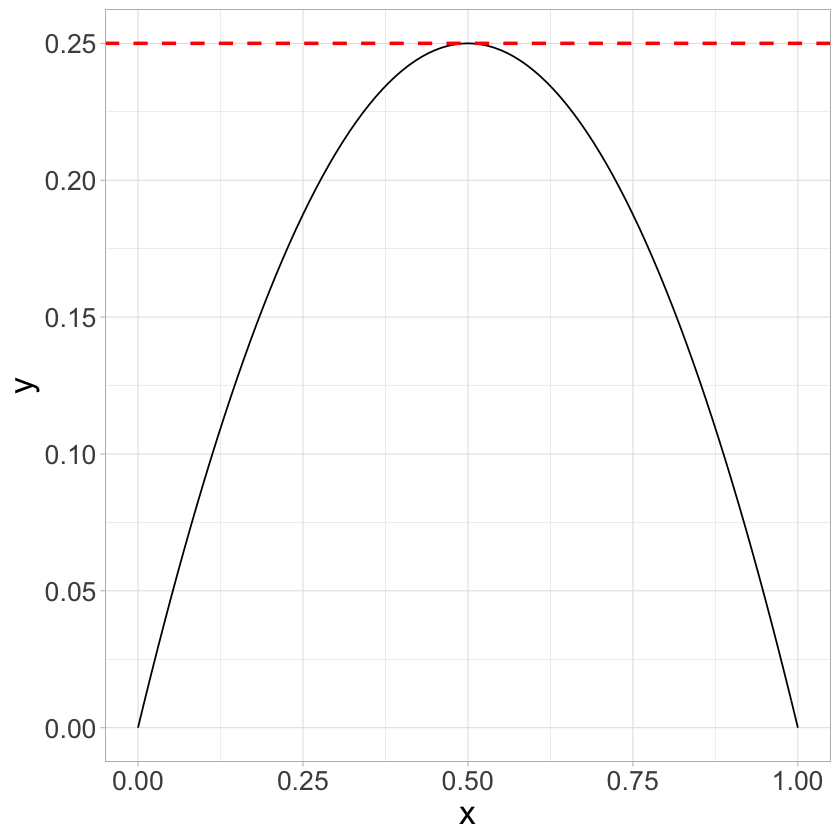

In [51]:
ggplot(data.frame(x=c(0, 1)), aes(x=x)) +
    stat_function(fun=function(p) p * (1-p)) +
    geom_hline(yintercept=1/4, linetype='dashed', color='red', size=1)

Luego, podemos acotar el numerador por $\tfrac{1}{4}$:

$P(|f_n-p| > 0.1) \leq \tfrac{p(1-p)}{0.01n} \leq \tfrac{\tfrac{1}{4}}{0.01n} = \tfrac{1}{0.04n} = \tfrac{25}{n}$

Para mejorar la estimación se pueden encuestar a más personas, aumentando así el $n$ y consecuentemente achicando la cota.

### Pregunta B

¿A cuánta gente debería encuestarse para que $P(|f_n-p| > 0.1) \leq 0.1$?

$\tfrac{25}{n} \leq 0.1 \iff \tfrac{25}{0.1} \leq n \iff 250 \leq n$